In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt


In [178]:
data = pd.read_csv('./data/historical_sales.csv')

In [132]:
data['SALE TYPE'].unique()

array(['MLS Listing', 'PAST SALE', 'New Construction Plan', 'Redfin Data',
       'For-Sale-by-Owner Listing', 'New Construction Home'], dtype=object)

In [179]:
past_sales = data[data['SALE TYPE'] == 'PAST SALE']

In [180]:
past_sales = past_sales[['SALE TYPE' , 'SOLD DATE', 'PROPERTY TYPE','ZIP OR POSTAL CODE', 'ADDRESS', 'CITY', 'STATE OR PROVINCE', 'PRICE',
               'BEDS', 'BATHS','LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH',
           'MLS#', 'LATITUDE','LONGITUDE']]

In [181]:
past_sales['ZIP OR POSTAL CODE'] = pd.to_numeric(past_sales['ZIP OR POSTAL CODE'])

In [182]:
past_sales = past_sales[past_sales['LOT SIZE']< 3000000]

In [183]:
past_sales = past_sales[past_sales['PROPERTY TYPE'] == "Single Family Residential"]

In [184]:
## Read in and merge school rating data by zip code

school_data = pd.read_json("./data/great_schools.json")
school_data = school_data.dropna(how='any',axis=0) 
school_by_zip = school_data.groupby('zip')['overallRating'].mean()
past_sales = pd.merge(past_sales, school_by_zip, left_on = 'ZIP OR POSTAL CODE', right_on = 'zip')
past_sales = past_sales.dropna(how='any',axis=0) 


In [217]:
X = numeric_sales
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 30)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

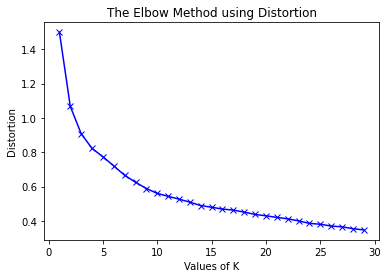

In [218]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [219]:
## Cluster on specificed features 
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_sales = past_sales[['overallRating', 'LATITUDE','LONGITUDE']]
kmeans = KMeans(n_clusters=12, random_state=0).fit(numeric_sales)
past_sales['cluster'] = kmeans.labels_


In [220]:
past_sales.groupby('cluster').count()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ZIP OR POSTAL CODE,ADDRESS,CITY,STATE OR PROVINCE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,$/SQUARE FEET,HOA/MONTH,MLS#,LATITUDE,LONGITUDE,overallRating
cluster,,,,,,,,,,,,,,,,,,,,
0,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956,2956
1,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077
2,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
3,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546,2546
4,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055,2055
5,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138,2138
6,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864,1864
7,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802,1802
8,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765,1765


In [221]:
target = np.log(past_sales['PRICE'])

In [222]:
## Get numeric columns for model before dummifying and drop sales price and
## features used to cluster from the model

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for_linear = past_sales.select_dtypes(include=numerics)
for_linear.drop('PRICE', axis=1, inplace =True)
for_linear.drop('LONGITUDE', axis=1, inplace =True)
for_linear.drop('LATITUDE', axis=1, inplace =True)
for_linear.drop('overallRating', axis=1, inplace =True)

C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [223]:
for_linear.columns

Index(['ZIP OR POSTAL CODE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', '$/SQUARE FEET', 'HOA/MONTH', 'cluster'],
      dtype='object')

In [224]:
X_train, X_test, y_train, y_test = train_test_split(for_linear, target, test_size = 0.2, random_state = 0)

In [225]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("Train score = ", lm.score(X_train, y_train))
print("Test score = ", lm.score(X_test, y_test))

Train score =  0.5695730160062072
Test score =  0.528729593846635
